# 1.4 EV on a Paraboloid Landscape
We consider a simple geno/phenospace: $x \in [-0.5, 0.5]\times[-0.5, 0.5]$.

The objective fitness function is $F(x) = x_1^2 + x_2^2$.

Population size: 10.

The mutation consist of a 2D-vector $\epsilon$ which is added to the parent individual to generate a newborn. The mutation $\epsilon$ is extracted from a bivariate normal distribution: $\epsilon \sim GM(s) = \mathcal{N}(\textbf{0}, \frac{s}{\sqrt{2/\pi}} \mathbb{1})$

Eventually, a candidate will be selected from the initial population, and the one with the highest fitness between the candidate and the son previously generated will be kept. The other one will extinguish.

### Observations
We have four symmetric maxima over the given landscape. Each individual influences the evolution of the population towards its closest maximum, with an intensity proportional to how much close it is to that maximum. This effect is an indirect consequence of the way in which the evolution process is defined.

Therefore, after some initial oscillations of the mean genotype, the population will converge to the same maximum.

In [1]:
import numpy as np
np.set_printoptions(precision=2)
import matplotlib.pyplot as plt

In [2]:
def fitness(x):
    return np.linalg.norm(x, axis=-1) ** 2

def mutate(x, s=1):
    mutation = np.random.normal(0, s, size=x.shape)
    return np.clip(x + mutation, -5, 5)

def new_generation(population, s=1):
    # Parent selection by uniform distribution
    parent_idx = np.random.randint(pop_size)
    parent = population[parent_idx]
    
    # Son generation by mutating the parent
    son = mutate(parent, s)
    son_fitness = fitness(son)
    
    # Candidate selection by uniform distribution
    candidate_idx = np.random.randint(pop_size)
    candidate = population[candidate_idx]
    candidate_fitness = fitness(candidate)

    # Only the fittest among the candidate and the newborn is selected to survive
    population[candidate_idx] = [candidate, son][int(candidate_fitness < son_fitness)]
    
    return population

def print_population(population, fitness):
    print("#\tFitness\t\tIndividual")
    for i in range(population.shape[0]):
        print("{}\t{:.2f}\t\t{}".format(i, fitness[i], population[i]))

In [3]:
pop_size = 10

# initialize the population: generation 0
population = np.random.uniform(low=-5.0, high=5.0, size=(pop_size, 2))
population_fitness = fitness(population)

print_population(population, population_fitness)

#	Fitness		Individual
0	41.44		[-4.58  4.52]
1	10.49		[-0.31 -3.22]
2	24.56		[-2.21  4.44]
3	30.29		[4.29 3.45]
4	11.11		[ 1.84 -2.78]
5	22.25		[-0.21 -4.71]
6	8.99		[-0.95 -2.84]
7	6.63		[-2.26  1.24]
8	28.71		[-4.18 -3.35]
9	20.47		[-3.64 -2.69]


In [4]:
# generation 1
s = 0.1
population = new_generation(population, s)
population_fitness = fitness(population)

print_population(population, population_fitness)

#	Fitness		Individual
0	41.44		[-4.58  4.52]
1	10.49		[-0.31 -3.22]
2	24.56		[-2.21  4.44]
3	30.29		[4.29 3.45]
4	11.11		[ 1.84 -2.78]
5	22.25		[-0.21 -4.71]
6	8.99		[-0.95 -2.84]
7	6.63		[-2.26  1.24]
8	28.71		[-4.18 -3.35]
9	29.68		[4.2  3.47]


In [5]:
best_individual_per_gen = [np.max(fitness(population))]
for i in range(500):
    population = new_generation(population, s)
    best_individual_per_gen += [np.max(fitness(population))]
    
population_fitness = fitness(population)
print_population(population, population_fitness)

#	Fitness		Individual
0	50.00		[-5.  5.]
1	50.00		[-5.  5.]
2	50.00		[-5.  5.]
3	50.00		[-5.  5.]
4	50.00		[-5.  5.]
5	50.00		[-5.  5.]
6	50.00		[-5.  5.]
7	50.00		[-5.  5.]
8	50.00		[-5.  5.]
9	50.00		[-5.  5.]


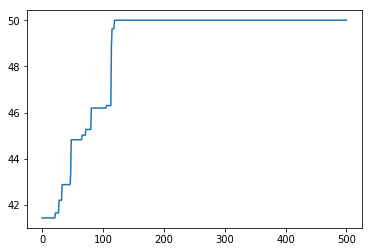

In [6]:
plt.plot(best_individual_per_gen);